In [1]:
import pandas as pd 

# **A. Data Analysis with IMDB Movie data**

### IMDB-Movie-Data
* Data Analysis


In [221]:
df  = pd.read_csv("datas/IMDB-Movie-Data.csv")
print(df.head())

   Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5            Suicide Squad  Action,Adventure,Fantasy   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of th...            David Ayer   

                                              Actors  Year  Runtime (Minutes)  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014                121

In [9]:
print(df.tail())

     Rank                   Title                  Genre  \
995   996    Secret in Their Eyes    Crime,Drama,Mystery   
996   997         Hostel: Part II                 Horror   
997   998  Step Up 2: The Streets    Drama,Music,Romance   
998   999            Search Party       Adventure,Comedy   
999  1000              Nine Lives  Comedy,Family,Fantasy   

                                           Description          Director  \
995  A tight-knit team of rising investigators, alo...         Billy Ray   
996  Three American college students studying abroa...          Eli Roth   
997  Romantic sparks occur between two dance studen...        Jon M. Chu   
998  A pair of friends embark on a mission to reuni...    Scot Armstrong   
999  A stuffy businessman finds himself trapped ins...  Barry Sonnenfeld   

                                                Actors  Year  \
995  Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...  2015   
996  Lauren German, Heather Matarazzo, Bijou Philli...

### How many columns in this dataset

In [16]:
print(df.columns)
print(type(df.columns))

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')
<class 'pandas.core.indexes.base.Index'>


### Basic information 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


### Describe data method

In [40]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


### Check isna of null
```python
* use pd.isna(df['Revenue (Millions)']) to return Series data
* a.sum() return number of True Value 
* len(a) - a.sum() = number of False value
```

In [45]:
a = pd.isna(df["Revenue (Millions)"])
print(type(a))
print(a)
print(a.sum())
print(f'Number of True value is: {a.sum()}')

<class 'pandas.core.series.Series'>
0      False
1      False
2      False
3      False
4      False
       ...  
995     True
996    False
997    False
998     True
999    False
Name: Revenue (Millions), Length: 1000, dtype: bool
128


### Check isnull 

In [46]:
a = pd.isnull(df["Revenue (Millions)"])
print(type(a))
print(a)
print(a.sum())
print(f'Number of True value is: {a.sum()}')

<class 'pandas.core.series.Series'>
0      False
1      False
2      False
3      False
4      False
       ...  
995     True
996    False
997    False
998     True
999    False
Name: Revenue (Millions), Length: 1000, dtype: bool
128
Number of True value is: 128


### Drop row with null or nan
```noted
* When you use data_frame.dropnan() that mean you drop the row
```
```python 
df_not_nan = df.dropnan()

```

In [85]:
a = pd.isnull(df["Revenue (Millions)"])
df_null = df[a]["Revenue (Millions)"]

df_not_nan = df.dropna(inplace= False)
df_not_nan

# Recheck one columns after dropnan()
print(pd.isnull(df_not_nan["Revenue (Millions)"]))


0      False
1      False
2      False
3      False
4      False
       ...  
993    False
994    False
996    False
997    False
999    False
Name: Revenue (Millions), Length: 838, dtype: bool


### Data Selection, Indexing and slicing data 
* Separated any columns into Series data
* access data based index or slicing
```python
* Columns Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

```

In [47]:
df['Rank']

0         1
1         2
2         3
3         4
4         5
       ... 
995     996
996     997
997     998
998     999
999    1000
Name: Rank, Length: 1000, dtype: int64

In [51]:
somes_columns = df[['Rating','Votes']]
somes_columns

,Rating,Votes
0,8.1,757074
1,7.0,485820
2,7.3,157606
3,7.2,60545
4,6.2,393727
...,...,...
995,6.2,27585
996,5.5,73152
997,6.2,70699
998,5.6,4881


### Data Selection - Based on condition filtering
* How do I express the filtering
* cause: with each condition we have to put in into ()
```python 
df
* Only one condition: df[df["Revenue (Millions)"]]
* Much more condition: df[df["Revenue (Millions)"] & df["Revenue (Millions)"]]
* Much more condition: df[df["Revenue (Millions)"] or & df["Revenue (Millions)"]]

```

In [222]:
print(f'Min of Revenue (Millions): {df["Revenue (Millions)"].mean()}')
print(f'Min of Rating: {df["Rating"]}')

and_condition = df[(df["Revenue (Millions)"]>100) & (df["Rating"]>0)]["Revenue (Millions)"]
and_condition

Min of Revenue (Millions): 82.95637614678898
Min of Rating: 0      8.1
1      7.0
2      7.3
3      7.2
4      6.2
      ... 
995    6.2
996    5.5
997    6.2
998    5.6
999    5.3
Name: Rating, Length: 1000, dtype: float64


0      333.13
1      126.46
2      138.12
3      270.32
4      325.02
        ...  
924    200.07
925    281.28
935    148.21
941    300.52
946    116.63
Name: Revenue (Millions), Length: 250, dtype: float64

In [69]:
and_condition = df[(df["Revenue (Millions)"]>100) | (df["Rating"]>0)]["Revenue (Millions)"]
and_condition

0      333.13
1      126.46
2      138.12
3      270.32
4      325.02
        ...  
995       NaN
996     17.54
997     58.01
998       NaN
999     19.64
Name: Revenue (Millions), Length: 1000, dtype: float64

#### Select base-on row

In [228]:
print(df['Rating'] <= 1000000)
df.loc[df['Rating'] <= 1000000]

0      True
1      True
2      True
3      True
4      True
       ... 
995    True
996    True
997    True
998    True
999    True
Name: Rating, Length: 1000, dtype: bool


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


#### Cross Condition 
```python
* Attention: the data type must be suitable (Same the data type)
```

In [230]:
df[df['Rating'] <= df['Metascore']]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


### Groupby Operations
```python 
* Assumsion we have Columns Director and Rating and you have to groupby Director and Rating based on mean of Rating  
* Let imagine one director may have many film and with each film we also have rating, so that is reason why make groupby director and mean of rating
* Let see through the result below

```

In [116]:
data_groupby = df.groupby("Director")["Rating"].mean().head()
data_groupby

Director
Aamir Khan             8.5
Abdellatif Kechiche    7.8
Adam Leon              6.5
Adam McKay             7.0
Adam Shankman          6.3
Name: Rating, dtype: float64

### Sorting Operations
```python
* Let concentrate in "ascending"  flat 
* increasing in size or amount --> ascending = False
* decreasing in size or amount --> asceding = True
```

In [118]:
df.groupby("Director")["Rating"].mean().sort_values(ascending= True).head()

Director
Jason Friedberg      1.9
James Wong           2.7
Shawn Burkett        2.7
Jonathan Holbrook    3.2
Femi Oyeniran        3.5
Name: Rating, dtype: float64

In [119]:
df.groupby("Director")["Rating"].mean().sort_values(ascending= False).head()

Director
Nitesh Tiwari        8.80
Christopher Nolan    8.68
Olivier Nakache      8.60
Makoto Shinkai       8.60
Aamir Khan           8.50
Name: Rating, dtype: float64

### View Missing Value

In [84]:
df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

### Deal with missing values - Deleting
```python
* With Deleting that mean you'll remove the colums consist null value (if it's apprear so much)
* if inplace = True that mean, you make modification on root value, in the other hand after deleting sucessfull, the result is saved on root value

``` 

#### Delete columns

In [91]:
drop_meta_score = df.drop("Metascore", axis=1).head()
drop_meta_score
drop_meta_score.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)'],
      dtype='object')

#### Delete row
``` text
* after you use dropnan() and method isnull().sum() called. You'll see data frame have no nan value
```

In [93]:
drop_nan = df.dropna()
drop_nan.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

### Dealing with missing value - Filling
```python
* in this method you'll fill missing value with specific value. It's mean
filled_value = df["Revenue (Millions)"].fillnan(df["Revenue (Millions)"].mean())
```

In [95]:
print(df.isnull().sum())

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64


In [104]:
mumber_missing_value = df['Revenue (Millions)'].isnull().sum()
print(f'Before filling value we have {mumber_missing_value} missing value')
revenue_value = df['Revenue (Millions)'].fillna(df["Revenue (Millions)"].mean())
revenue_value.isnull().sum()

Before filling value we have 128 missing value


0

### Using method apply with purpose customize function

```python 
* Assumsion I create rating group function. The function receive rating and return class corresponding with rating input
* Make new columns with name "Rating_Category" in the data frame

```

In [122]:
def rating_group(rating):
    if rating >= 7.5:
        return "Good"
    elif rating >= 6.0:
        return "Average"
    else:
        return "Bad"
    
df["Rating_Category"] = df["Rating"].apply(rating_group)
print(df[["Title","Director","Rating","Rating_Category"]])

                       Title              Director  Rating Rating_Category
0    Guardians of the Galaxy            James Gunn     8.1            Good
1                 Prometheus          Ridley Scott     7.0         Average
2                      Split    M. Night Shyamalan     7.3         Average
3                       Sing  Christophe Lourdelet     7.2         Average
4              Suicide Squad            David Ayer     6.2         Average
..                       ...                   ...     ...             ...
995     Secret in Their Eyes             Billy Ray     6.2         Average
996          Hostel: Part II              Eli Roth     5.5             Bad
997   Step Up 2: The Streets            Jon M. Chu     6.2         Average
998             Search Party        Scot Armstrong     5.6             Bad
999               Nine Lives      Barry Sonnenfeld     5.3             Bad

[1000 rows x 4 columns]


# **B. Data Analysis with Time Series Data**

In [127]:
df = pd.read_csv("datas/opsd_germany_daily.csv")
print(df.shape)
print(df.dtypes)
df.head(3)

(4383, 5)
Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object


,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


### set_index method
```python
* You can set index of data frame is any column, however it's unique
```


In [130]:
df_date  = df.set_index("Date")
print(df_date.head(3))

            Consumption  Wind  Solar  Wind+Solar
Date                                            
2006-01-01     1069.184   NaN    NaN         NaN
2006-01-02     1380.521   NaN    NaN         NaN
2006-01-03     1442.533   NaN    NaN         NaN


### How to parse_dates in data frame
```python 
* 1: using read_csv(parse_dates = True)
* 2: parse when you process
```

In [175]:
df = pd.read_csv("datas/opsd_germany_daily.csv",index_col =0 , parse_dates = True)
print(df.head(3))
print(len(df))

            Consumption  Wind  Solar  Wind+Solar
Date                                            
2006-01-01     1069.184   NaN    NaN         NaN
2006-01-02     1380.521   NaN    NaN         NaN
2006-01-03     1442.533   NaN    NaN         NaN
4383


In [149]:
df ['Year'] = df.index.year
df ['Month'] = df.index.month
df ['Weekday Name'] = df.index.day_name ()
df .sample (5 , random_state =0)
print(df.head(10))

            Consumption  Wind  Solar  Wind+Solar  Year  Month Weekday Name
Date                                                                      
2006-01-01     1069.184   NaN    NaN         NaN  2006      1       Sunday
2006-01-02     1380.521   NaN    NaN         NaN  2006      1       Monday
2006-01-03     1442.533   NaN    NaN         NaN  2006      1      Tuesday
2006-01-04     1457.217   NaN    NaN         NaN  2006      1    Wednesday
2006-01-05     1477.131   NaN    NaN         NaN  2006      1     Thursday
2006-01-06     1403.427   NaN    NaN         NaN  2006      1       Friday
2006-01-07     1300.287   NaN    NaN         NaN  2006      1     Saturday
2006-01-08     1207.985   NaN    NaN         NaN  2006      1       Sunday
2006-01-09     1529.323   NaN    NaN         NaN  2006      1       Monday
2006-01-10     1576.911   NaN    NaN         NaN  2006      1      Tuesday


### Time-based Indexing
```python
* You can use slicing operator (in loc attribute) like the numpy 
```

In [152]:
df.loc["2006-01-02": "2006-01-05"]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,Monday
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,Tuesday
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,Wednesday
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,Thursday


### Partial-string indexing

```python
It's allown you demonstrate with commnd date time, sometime no need the exactly
Example: df["2006-01"]

```

In [157]:
df.loc["2006-01": "2006-01-02"]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,Sunday
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,Monday


### Visualizing time series data
```python 
* Depend on you need, matplotlib or seaborn is choosen

```

In [162]:
import matplotlib.pyplot as plt 
import seaborn as sns

<Axes: xlabel='Date'>

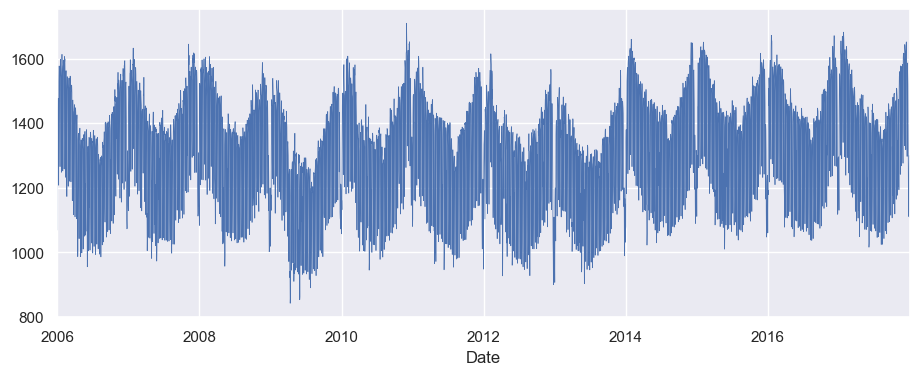

In [164]:
sns.set(rc ={'figure.figsize':(11 , 4) })
df['Consumption'].plot(linewidth =0.5)

### Plot in individual data

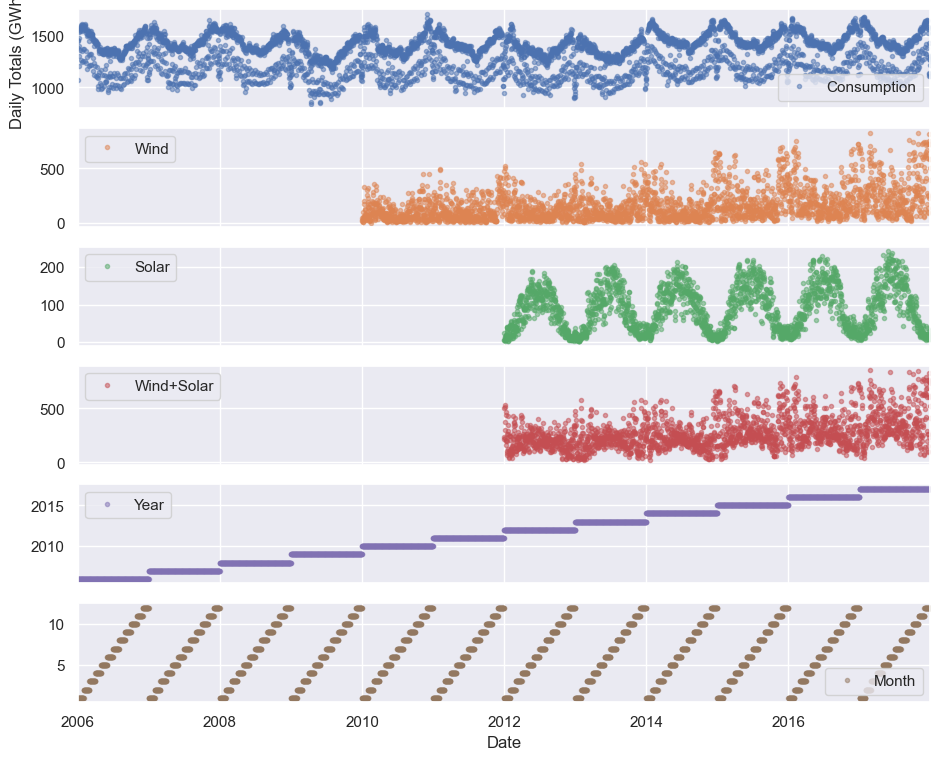

In [167]:
cols_plot = ["Consumption",	"Wind",	"Solar","Wind+Solar","Year","Month"]
axes = df[cols_plot].plot(marker =".", alpha =0.5 , linestyle ="None",
figsize =(11 , 9),subplots = True )
for ax in axes:
    ax.set_ylabel ('Daily Totals (GWh)')
    plt.show ()

### seasonality

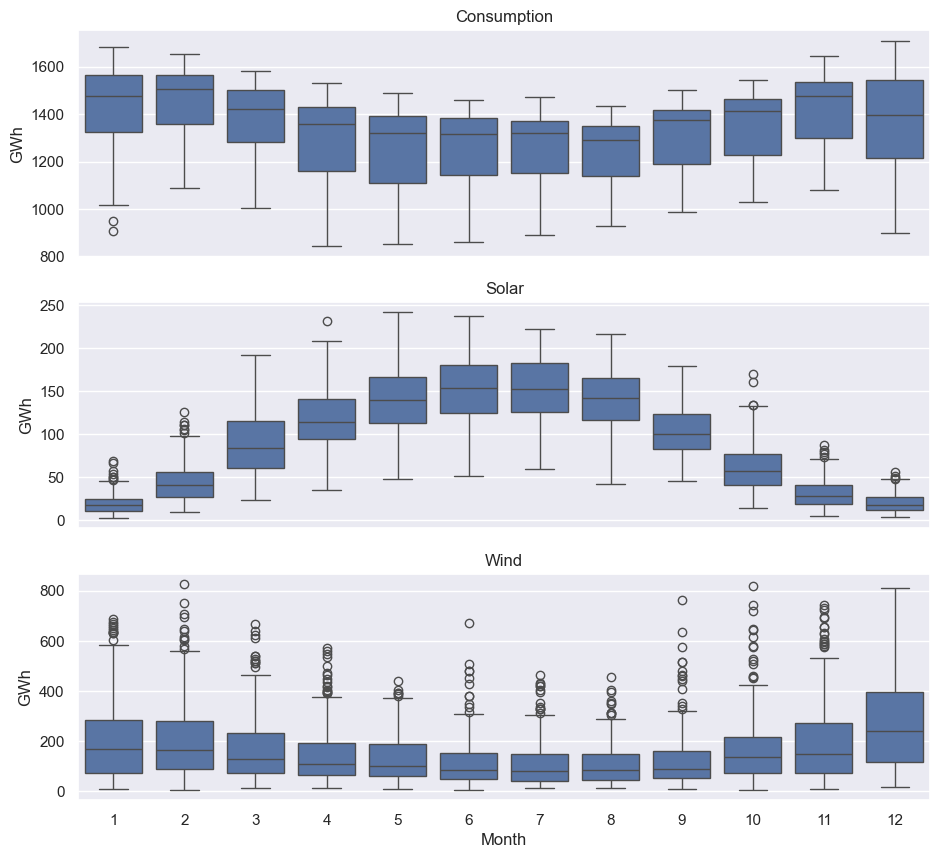

In [171]:
fig , axes = plt.subplots(3, 1 , figsize =(11 , 10) , sharex = True )
for name , ax in zip (["Consumption","Solar", "Wind"] , axes ) :
    sns.boxplot(data = df , x="Month", y=name , ax=ax)
    ax. set_ylabel("GWh")
    ax. set_title(name )
    # Remove the automatic x- axis label from all but the bottom subplot
    if ax != axes [ -1]:
        ax. set_xlabel ('')

### Frequencies

In [180]:
times_sample = pd.to_datetime(['2013 -02 -03', '2013 -02 -06', '2013 -02 -08'])
consum_sample = df.loc[times_sample, ['Consumption']].copy ()
consum_sample

,Consumption
2013-02-03,1109.639
2013-02-06,1451.449
2013-02-08,1433.098


In [182]:
# Convert the data to daily frequency , without filling any missings
consum_freq = consum_sample.asfreq('D')
# Create a column with missings forward filled
consum_freq ['Consumption - Forward Fill'] = consum_sample.asfreq ('D', method ='ffill')
consum_freq

,Consumption,Consumption - Forward Fill
2013-02-03,1109.639,1109.639
2013-02-04,NaN,1109.639
2013-02-05,NaN,1109.639
2013-02-06,1451.449,1451.449
2013-02-07,NaN,1451.449
2013-02-08,1433.098,1433.098


### Resampling
```python 
* Including UpSampling and DownSampling
* When do you use ReSampling: common we use it for Synthetic Information (Revenue of Company)
* When do you use UpSampling: common we use it for Interpolation ()
```

In [184]:
data_columns = ['Consumption','Wind', 'Solar', 'Wind+Solar']
# Resample to weekly frequency , aggregating with mean
opsd_weekly_mean = df[data_columns ].resample('W').mean()
opsd_weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


In [185]:
print(df.shape[0])
print(opsd_weekly_mean.shape[0])

4383
627


#### Visualize daily and weekly time series of Solar in 6 month

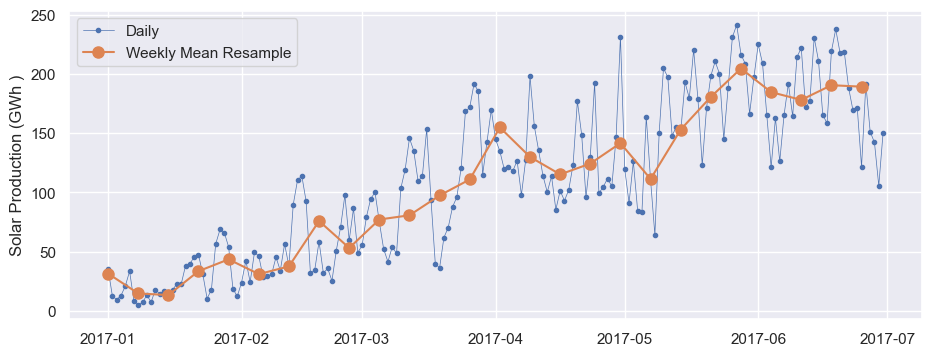

In [186]:
# Start and end of the date range to extract
start, end = '2017 -01', '2017 -06'
# Plot daily and weekly resampled time series together
fig , ax = plt.subplots ()
ax.plot(df .loc[ start :end ,'Solar'] ,marker ='.', linestyle ='-', linewidth =0.5 , label ='Daily')
ax.plot(opsd_weekly_mean.loc[ start :end , 'Solar'] ,
marker ='o', markersize =8 , linestyle ='-', label ='Weekly Mean Resample')
ax.set_ylabel ('Solar Production (GWh )')
ax.legend ()
plt.show ()

In [196]:
opsd_annual = df[data_columns].resample('YE').sum(min_count =360)
opsd_annual.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-12-31,489068.536,NaN,NaN,NaN
2007-12-31,496631.847,NaN,NaN,NaN
2008-12-31,495570.876,NaN,NaN,NaN


In [199]:
opsd_annual = opsd_annual.set_index(opsd_annual.index.year)
opsd_annual.index.name = 'Year'
# Compute the ratio of Wind + Solar to Consumption
opsd_annual['Wind + Solar / Consumption'] = opsd_annual ['Wind+Solar'] / opsd_annual['Consumption']
opsd_annual.tail(3)

,Consumption,Wind,Solar,Wind+Solar,Wind + Solar / Consumption
Year,,,,,
2015,505264.56300,77468.994,34907.138,112376.132,0.222410
2016,505927.35400,77008.126,34562.824,111570.950,0.220528
2017,504736.36939,102667.365,35882.643,138550.008,0.274500


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '2012'),
  Text(1, 0, '2013'),
  Text(2, 0, '2014'),
  Text(3, 0, '2015'),
  Text(4, 0, '2016'),
  Text(5, 0, '2017')])

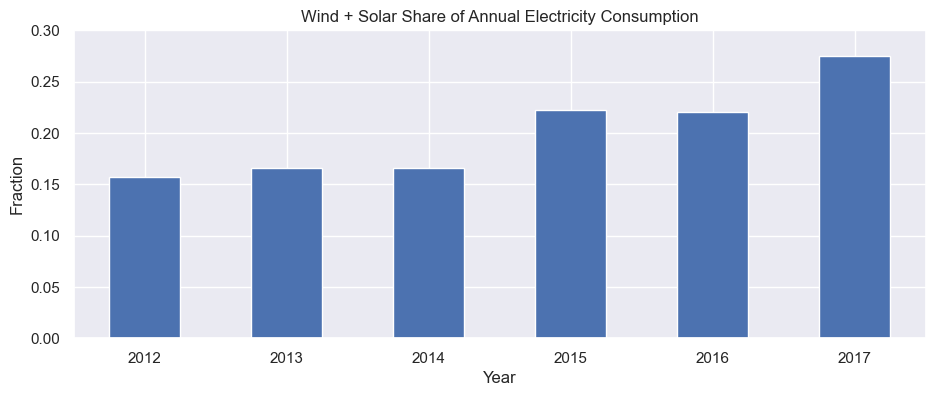

In [203]:
# Plot from 2012 onwards , because there is no solar production data in earlier years
ax = opsd_annual.loc[2012: ,'Wind + Solar / Consumption'].plot.bar(color ='C0')
ax.set_ylabel ('Fraction')
ax.set_ylim(0 ,0.3)
ax.set_title('Wind + Solar Share of Annual Electricity Consumption')
plt.xticks(rotation =0)

### Rolling window

#### Moving Average Example (Meaning How it working)

In [215]:
import pandas as pd
import numpy as np

# Create a sample DataFrame
data = pd.DataFrame({
    'B': [0, 1, 2, np.nan, 4]
})

# Apply a rolling window of size 2
rolling_window = data.rolling(window=2,center= False)

# Calculate the sum of each window
result = rolling_window.sum()
print(result)

     B
0  NaN
1  1.0
2  3.0
3  NaN
4  NaN


#### Rolling

In [210]:
# Compute the centered 7- day rolling mean
opsd_7d = df[data_columns].rolling(7 ,center = True ).mean()
print(df.head(10))
print(opsd_7d.head(10))

            Consumption  Wind  Solar  Wind+Solar
Date                                            
2006-01-01     1069.184   NaN    NaN         NaN
2006-01-02     1380.521   NaN    NaN         NaN
2006-01-03     1442.533   NaN    NaN         NaN
2006-01-04     1457.217   NaN    NaN         NaN
2006-01-05     1477.131   NaN    NaN         NaN
2006-01-06     1403.427   NaN    NaN         NaN
2006-01-07     1300.287   NaN    NaN         NaN
2006-01-08     1207.985   NaN    NaN         NaN
2006-01-09     1529.323   NaN    NaN         NaN
2006-01-10     1576.911   NaN    NaN         NaN
            Consumption  Wind  Solar  Wind+Solar
Date                                            
2006-01-01          NaN   NaN    NaN         NaN
2006-01-02          NaN   NaN    NaN         NaN
2006-01-03          NaN   NaN    NaN         NaN
2006-01-04  1361.471429   NaN    NaN         NaN
2006-01-05  1381.300143   NaN    NaN         NaN
2006-01-06  1402.557571   NaN    NaN         NaN
2006-01-07  1421.754

### Trends

#### Plot Trend 
* The min_periods =360 argument accounts for a few isolated missing days in the wind and solar production time series

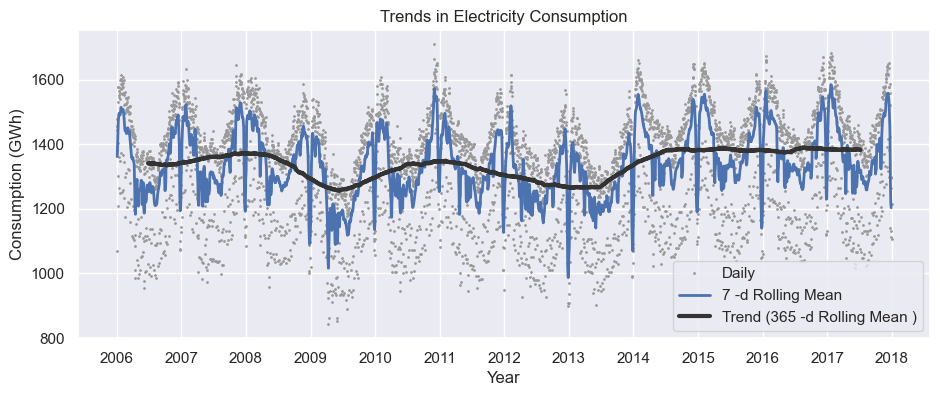

In [211]:
import matplotlib . dates as mdates

opsd_365d = df[data_columns].rolling(window =365 , center =True , min_periods=360) . mean ()

fig, ax = plt.subplots ()
ax.plot(df['Consumption'] , marker ='.', markersize =2 , color ='0.6',
linestyle ='None', label ='Daily')
ax.plot(opsd_7d['Consumption'] ,linewidth =2 ,label ='7 -d Rolling Mean')
ax.plot(opsd_365d['Consumption'] ,color ='0.2',linewidth =3 ,
label ='Trend (365 -d Rolling Mean )')
ax.xaxis.set_major_locator(mdates.YearLocator () )
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption')
plt.show()

#### Plot 365 - day rolling mean time series of wind and solar power

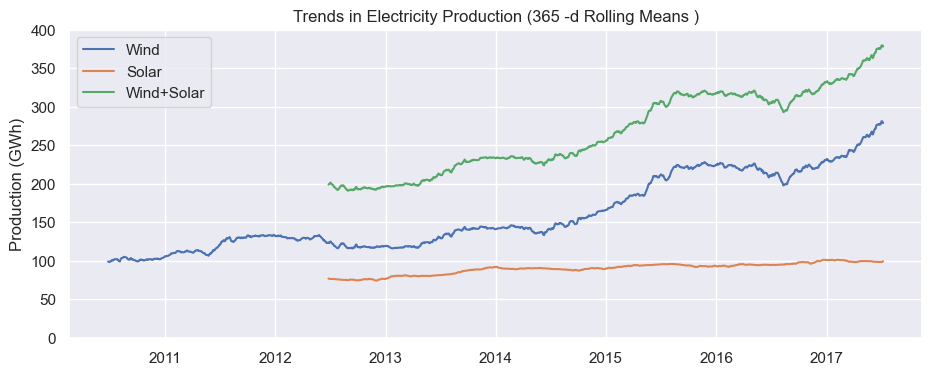

In [220]:
fig , ax = plt.subplots ()
for nm in ['Wind', 'Solar', 'Wind+Solar']:
    ax.plot(opsd_365d[nm], label =nm)
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.set_ylim(0 , 400)
    ax.legend()
    ax.set_ylabel('Production (GWh)')
    ax.set_title('Trends in Electricity Production (365 -d Rolling Means )')
plt.show ()